In [1]:
import os
import numpy as np
import pandas as pd

os.chdir('../core')

In [2]:
DATA_DIR = "../data"
FILE_NAME = "data.csv"

df = pd.read_csv(os.path.join(DATA_DIR, FILE_NAME))
df = df.drop(columns=["Cus.ID"])
df = df.drop(columns=["Date"])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

target_column = "Does he/she Come from Facebook Page?"
df[target_column] = df[target_column].map({"Yes": 1, "No": 0})
print(df.shape)

df

(8871, 9)


,Cus. Location,Age,Gender,Mobile Name,Sell Price,Does he/she Come from Facebook Page?,Does he/she Followed Our Page?,Did he/she buy any mobile before?,Did he/she hear of our shop before?
0,Rangamati Sadar,49,M,iQOO Neo 9 Pro 5G 12/256,23271.0,0,Yes,No,Yes
1,Inside Rangamati,22,F,Redmi Note 12 Pro 8/128,21682.0,1,Yes,Yes,No
2,Outside Rangamati,48,M,Narzo N53 4/64,13161.0,0,No,No,Yes
3,Outside Rangamati,38,M,Redmi Note 12 Pro 8/128,26133.0,0,No,No,Yes
4,Rangamati Sadar,34,F,iPhone 16 Pro 256GB,26221.0,0,No,No,Yes
...,...,...,...,...,...,...,...,...,...
8866,Outside Rangamati,35,F,Galaxy M35 5G 8/128,25311.0,0,Yes,No,Yes
8867,Rangamati Sadar,27,F,Pixel 7a 8/128,13065.0,0,Yes,No,Yes
8868,Outside Rangamati,49,F,Vivo T3x 5G 8/128,14166.0,0,No,Yes,Yes
8869,Rangamati Sadar,21,M,Pixel 7a 8/128,21195.0,0,No,No,Yes


In [3]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Chọn cột
numeric_columns = df.drop(columns=[target_column]).select_dtypes(include=['int64', 'float64']).columns.tolist()
category_columns = df.select_dtypes(include=['object']).columns.tolist()

# Pipeline cho categorical: encode -> scale
cat_pipeline = Pipeline([
    ('encoder', OrdinalEncoder()),   # hoặc OneHotEncoder nếu bạn muốn one-hot
    ('scaler', StandardScaler())
])

# Pipeline cho numeric: scale
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Ghép lại
processor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_columns),
        ('cat', cat_pipeline, category_columns)
    ]
)

# Fit transform
X = processor.fit_transform(df.drop(columns=[target_column]), df[target_column])
y = df[target_column].values.reshape(-1, 1)

X


array([[ 1.558891  , -0.09967878,  1.21916882, ...,  1.22227476,
        -0.5732283 ,  0.81239923],
       [-1.25593392, -0.18780095, -1.23940054, ...,  1.22227476,
         1.74450563, -1.23092189],
       [ 1.45463822, -0.66035535, -0.01011586, ..., -0.81814665,
        -0.5732283 ,  0.81239923],
       ...,
       [ 1.558891  , -0.60462044, -0.01011586, ..., -0.81814665,
         1.74450563,  0.81239923],
       [-1.36018669, -0.21480881,  1.21916882, ..., -0.81814665,
        -0.5732283 ,  0.81239923],
       [-0.73467004,  0.77233687,  1.21916882, ..., -0.81814665,
         1.74450563, -1.23092189]], shape=(8871, 8))

# Mini-batch Gradient Descent

In [4]:
folder = "minibatch-gradient-descent"
folder_path = f"../images/{folder}"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Parameters for plot
fontsize = 17
offset = 4

In [5]:
from base import LogisticRegressionBatchGD
from matplotlib import pyplot as plt
    
batch_sizes = [32, 64, 128, 256]
learning_rate = 0.1
num_iterations = 200
regularization = "None"

loss_loggers = {}
time_loggers = {}
gradient_loggers = {}
for batch_size in batch_sizes:
    lr = LogisticRegressionBatchGD(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        regularization=regularization,
        batch_size=batch_size,
        log=True
    )
    lr.fit(X, y)

    # Save logs
    loss_loggers[batch_size] = lr.history
    time_loggers[batch_size] = lr.times

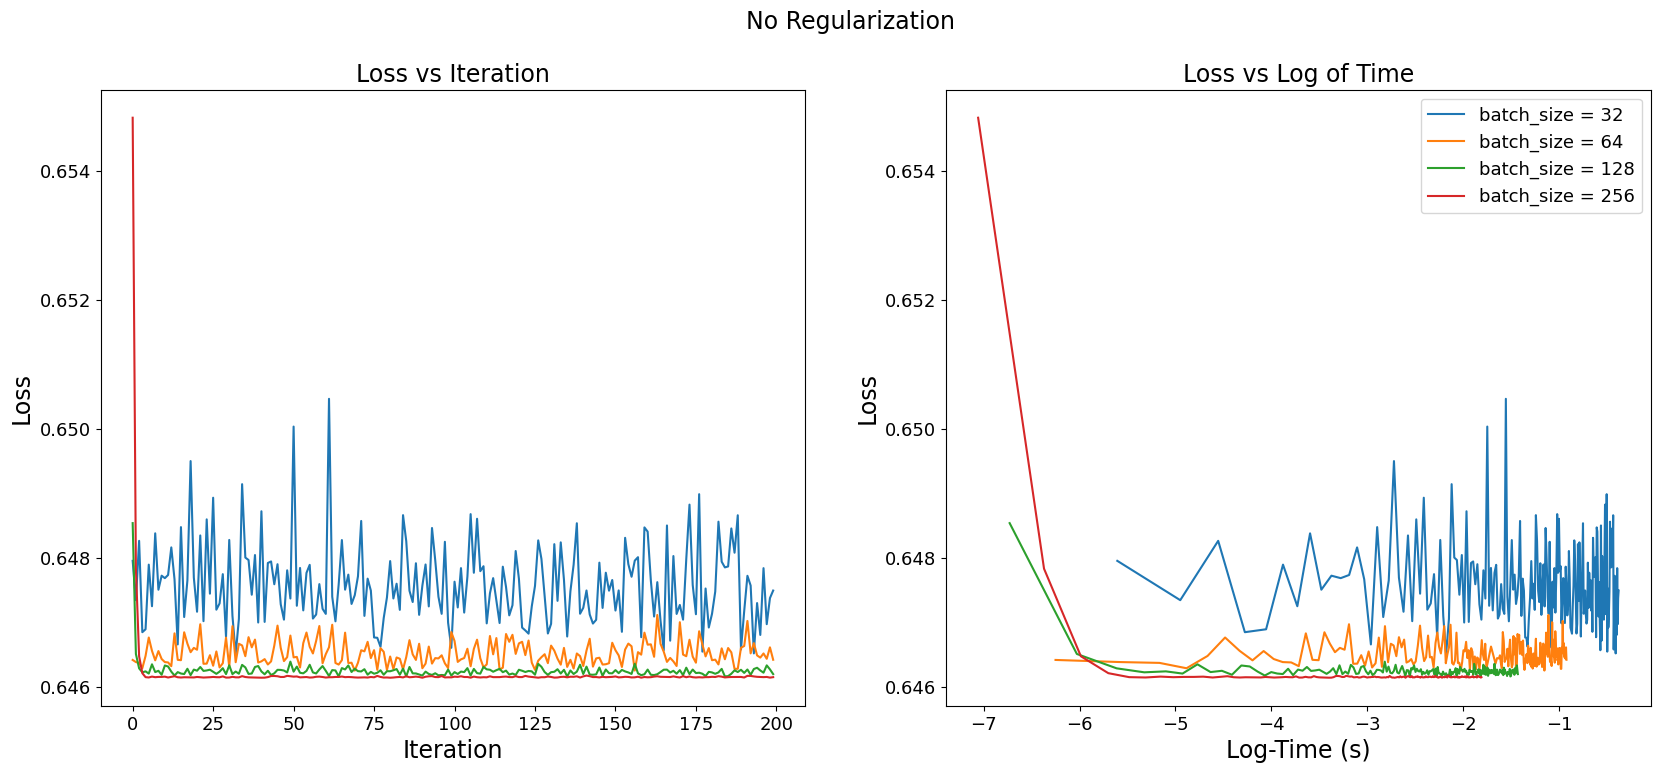

In [6]:
# Plot loss for each learning rate with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Title for the subplots
fig.suptitle("No Regularization", fontsize=fontsize)

# Set ylim for all subplots
# y_lb, y_ub = 0.548 ,0.56

# axs[0].set_ylim(y_lb, y_ub)
# axs[1].set_ylim(y_lb, y_ub)

# Plot loss vs iteration
axs[0].set_title("Loss vs Iteration", fontsize=fontsize)
for batch_size in batch_sizes:
    axs[0].plot(loss_loggers[batch_size], label=f"batch_size = {batch_size}")

axs[0].set_xlabel("Iteration", fontsize=fontsize)
axs[0].set_ylabel("Loss", fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize - offset)
axs[0].tick_params(axis='y', labelsize=fontsize - offset)
# axs[0].legend()

# Plot loss vs time
axs[1].set_title("Loss vs Log of Time", fontsize=fontsize)
for batch_size in batch_sizes:
    axs[1].plot(np.log(time_loggers[batch_size]), loss_loggers[batch_size], label=f"batch_size = {batch_size}")

axs[1].set_xlabel("Log-Time (s)", fontsize=fontsize)
axs[1].set_ylabel("Loss", fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize - offset)
axs[1].tick_params(axis='y', labelsize=fontsize - offset)
axs[1].legend(fontsize=fontsize - offset)

# Save image
file_path = f"{folder_path}/bgd_loss_no_regularization.png"
plt.savefig(file_path, format='png')

plt.show()

# L1 Regularization

In [7]:
lambda_values = [0, 10, 100, 1000]
learning_rate = 0.05
num_iterations = 200
regularization = "l1"

loss_loggers = {}
time_loggers = {}

for lambda_value in lambda_values:
    lr = LogisticRegressionBatchGD(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        regularization=regularization,
        lambda_=lambda_value,
        batch_size=128,
        log=True
    )
    lr.fit(X, y)

    # Save logs
    loss_loggers[lambda_value] = lr.history
    time_loggers[lambda_value] = lr.times

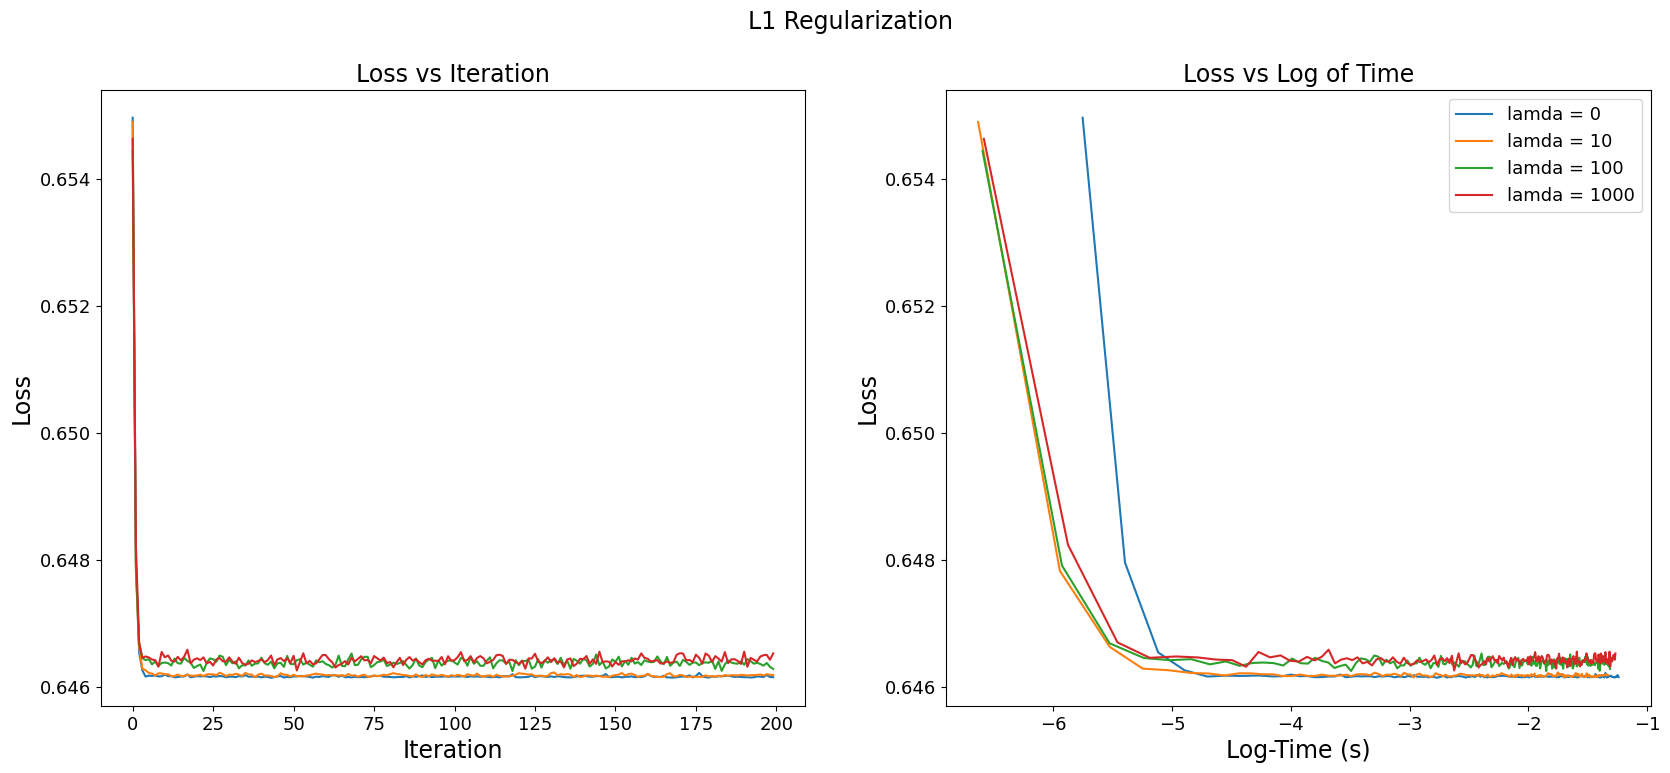

In [8]:
# Plot loss for each learning rate with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Title for the subplots
fig.suptitle("L1 Regularization", fontsize=fontsize)

# Set ylim for all subplots
# y_lb, y_ub = 0.548 ,0.58

# axs[0].set_ylim(y_lb, y_ub)
# axs[1].set_ylim(y_lb, y_ub)

# Plot loss vs iteration
axs[0].set_title("Loss vs Iteration", fontsize=fontsize)
for lambda_value in lambda_values:
    axs[0].plot(loss_loggers[lambda_value], label=f"lamda = {lambda_value}")

axs[0].set_xlabel("Iteration", fontsize=fontsize)
axs[0].set_ylabel("Loss", fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize - offset)
axs[0].tick_params(axis='y', labelsize=fontsize - offset)
# axs[0].legend()

# Plot loss vs time
axs[1].set_title("Loss vs Log of Time", fontsize=fontsize)
for lambda_value in lambda_values:
    axs[1].plot(np.log(time_loggers[lambda_value]), loss_loggers[lambda_value], label=f"lamda = {lambda_value}")

axs[1].set_xlabel("Log-Time (s)", fontsize=fontsize)
axs[1].set_ylabel("Loss", fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize - offset)
axs[1].tick_params(axis='y', labelsize=fontsize - offset)
axs[1].legend(fontsize=fontsize - offset)

# Save image
file_path = f"{folder_path}/bgd_loss_l1_regularization.png"
plt.savefig(file_path, format='png')

plt.show()

# L2 Regularization

In [11]:
lambda_values = [0, 10, 100, 1000]
learning_rate = 0.05
num_iterations = 200
regularization = "l2"

loss_loggers = {}
time_loggers = {}

for lambda_value in lambda_values:
    lr = LogisticRegressionBatchGD(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        regularization=regularization,
        lambda_=lambda_value,
        batch_size=128,
        log=True
    )
    lr.fit(X, y)

    # Save logs
    loss_loggers[lambda_value] = lr.history
    time_loggers[lambda_value] = lr.times

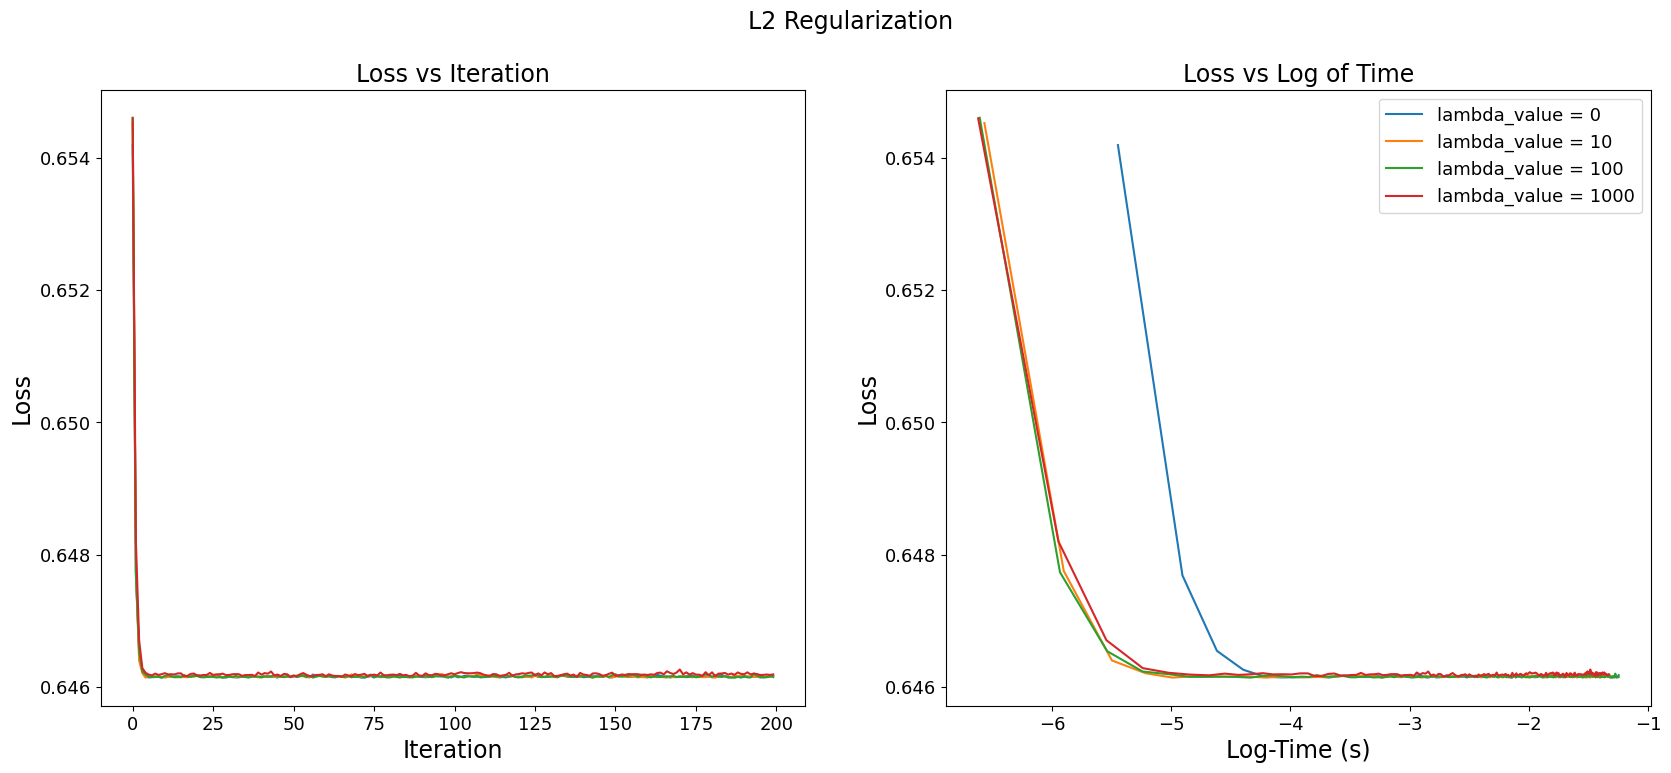

In [12]:
# Plot loss for each learning rate with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Title for the subplots
fig.suptitle("L2 Regularization", fontsize=fontsize)

# Set ylim for all subplots
# y_lb, y_ub = 0.548 ,0.57

# axs[0].set_ylim(y_lb, y_ub)
# axs[1].set_ylim(y_lb, y_ub)

# Plot loss vs iteration
axs[0].set_title("Loss vs Iteration", fontsize=fontsize)
for lambda_value in lambda_values:
    axs[0].plot(loss_loggers[lambda_value], label=f"lambda_value = {lambda_value}")

axs[0].set_xlabel("Iteration", fontsize=fontsize)
axs[0].set_ylabel("Loss", fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize - offset)
axs[0].tick_params(axis='y', labelsize=fontsize - offset)
# axs[0].legend()

# Plot loss vs time
axs[1].set_title("Loss vs Log of Time", fontsize=fontsize)
for lambda_value in lambda_values:
    axs[1].plot(np.log(time_loggers[lambda_value]), loss_loggers[lambda_value], label=f"lambda_value = {lambda_value}")

axs[1].set_xlabel("Log-Time (s)", fontsize=fontsize)
axs[1].set_ylabel("Loss", fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize - offset)
axs[1].tick_params(axis='y', labelsize=fontsize - offset)
axs[1].legend(fontsize=fontsize - offset)

# Save image
file_path = f"{folder_path}/bgd_loss_l2_regularization.png"
plt.savefig(file_path, format='png')

plt.show()